In [2]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


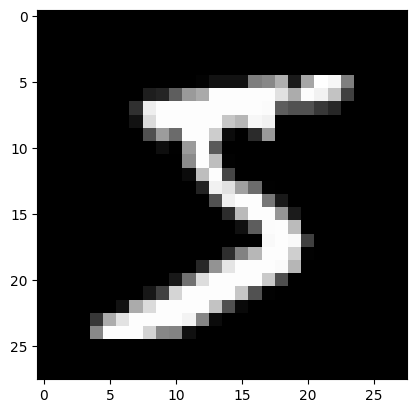

In [9]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

In [70]:
def visualize_img(data, num_of_images: int = 0, rand: bool = False):
  plt.imshow(data, cmap="gray")
  plt.show()

  if rand:
    plt.figure(figsize=(10, 10))
    for i in range(num_of_images):
      ax = plt.subplot(5, 5, i+1)
      plt.imshow(data[i], cmap="gray")
      plt.axis("off")


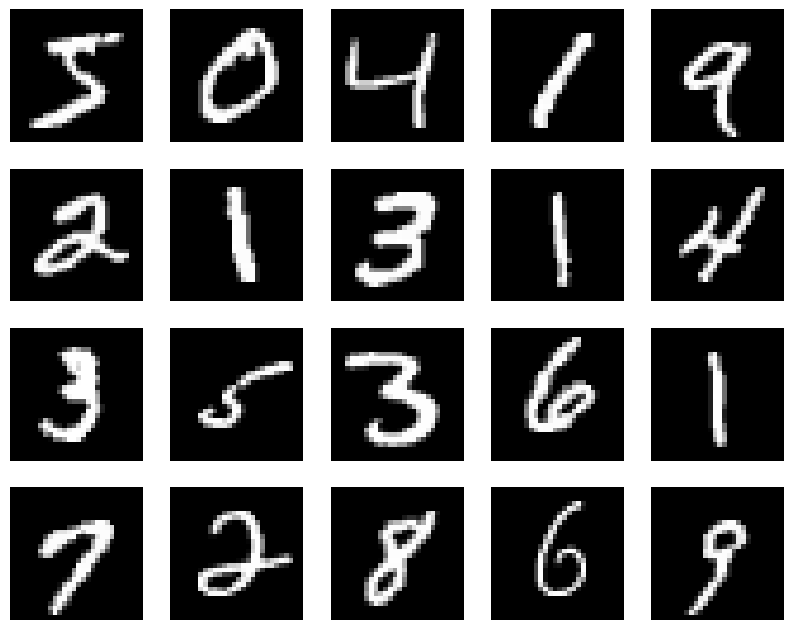

In [23]:
visualize_img(X_train, 20)

In [38]:
def pixel_visualize(img: np.ndarray, is_scaled: bool = False):
  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap="gray")

  width, height = img.shape

  for x in range(width):
    for y in range(height):
      # Determine the color based on whether the image is scaled
      text_color = "white" if (is_scaled and img[x][y] < 0.5) or (not is_scaled and img[x][y] < 128) else "black"
      ax.annotate(
        str(round(img[x][y], 2)),  # Annotate with the actual pixel value
        xy=(y, x),
        horizontalalignment="center",
        verticalalignment="center",
        color=text_color
        )

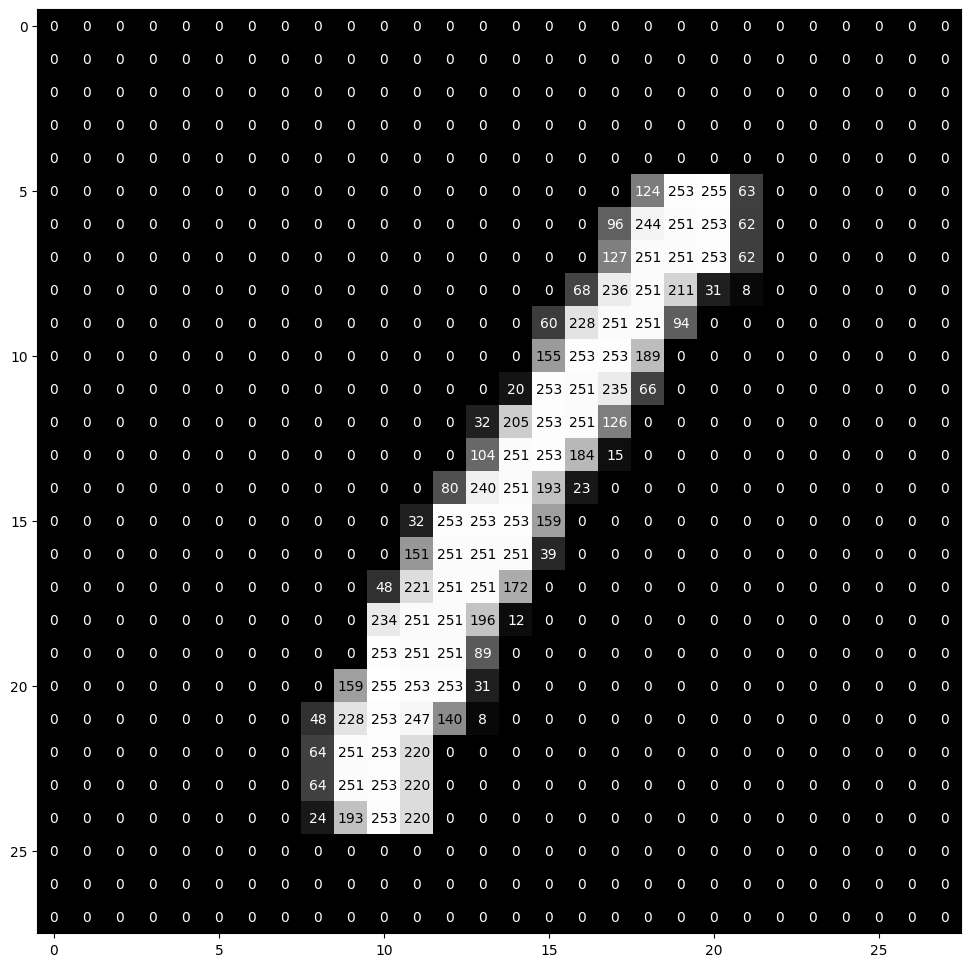

In [39]:
pixel_visualize(X_train[3])

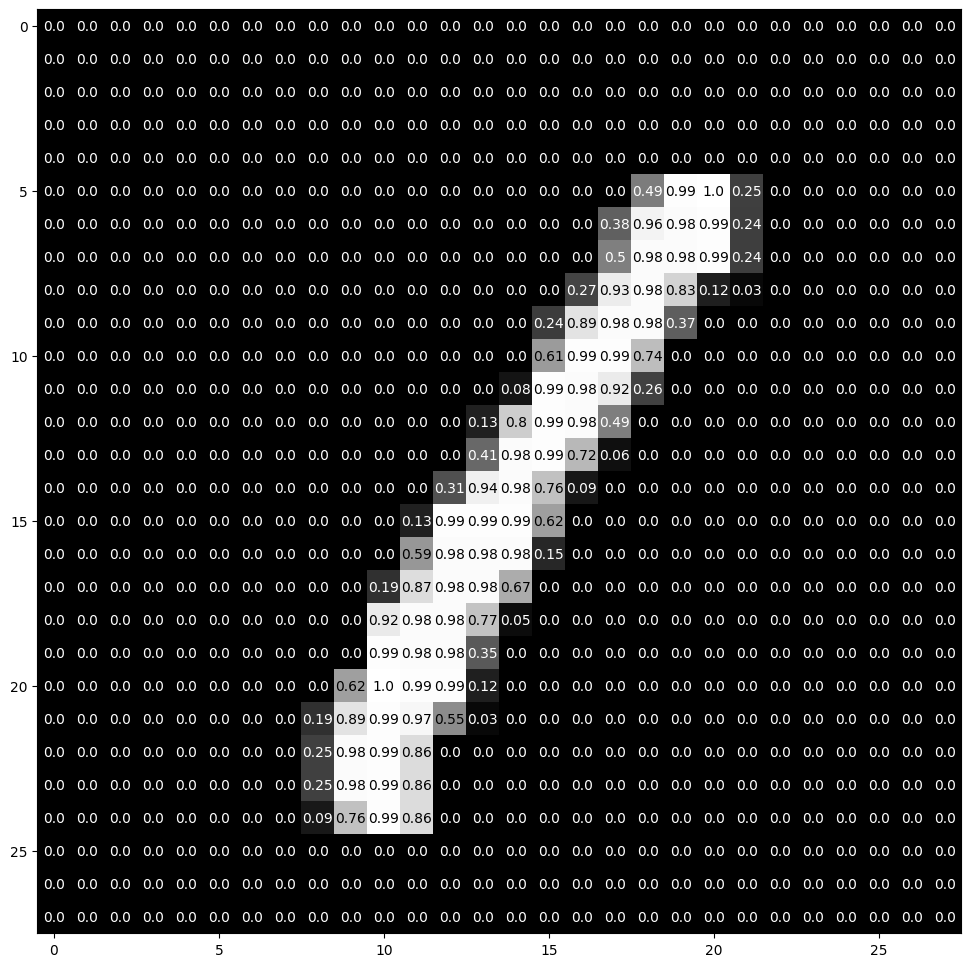

In [40]:
pixel_visualize(X_train[3] / 255, is_scaled=True)

In [51]:
# Reload the original MNIST data to ensure y_train and y_test are in their original integer format
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Encoding
"""
Before -> [5 0 4 1 9]
After -> [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
"""
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Reshaping
# Add a channel dimension to the images
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [52]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation="relu", name="layer1"),
    Dense(10, activation="softmax", name="output_layer")
])

In [53]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]
)


In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9827 - loss: 0.0607 - precision_1: 0.9860 - recall_1: 0.9796 - val_accuracy: 0.9728 - val_loss: 0.0861 - val_precision_1: 0.9771 - val_recall_1: 0.9692
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9851 - loss: 0.0518 - precision_1: 0.9876 - recall_1: 0.9826 - val_accuracy: 0.9751 - val_loss: 0.0796 - val_precision_1: 0.9789 - val_recall_1: 0.9733
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9888 - loss: 0.0417 - precision_1: 0.9909 - recall_1: 0.9864 - val_accuracy: 0.9749 - val_loss: 0.0834 - val_precision_1: 0.9781 - val_recall_1: 0.9723
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9904 - loss: 0.0371 - precision_1: 0.9918 - recall_1: 0.9887 - val_accuracy: 0.9762 - val_loss: 0.0748 - val_precision_1: 0.9791 - val_recall_1: 0.9739
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9923 - loss: 0.0302 - precision_1: 0.9931 - recall_1: 0.9909 - val_

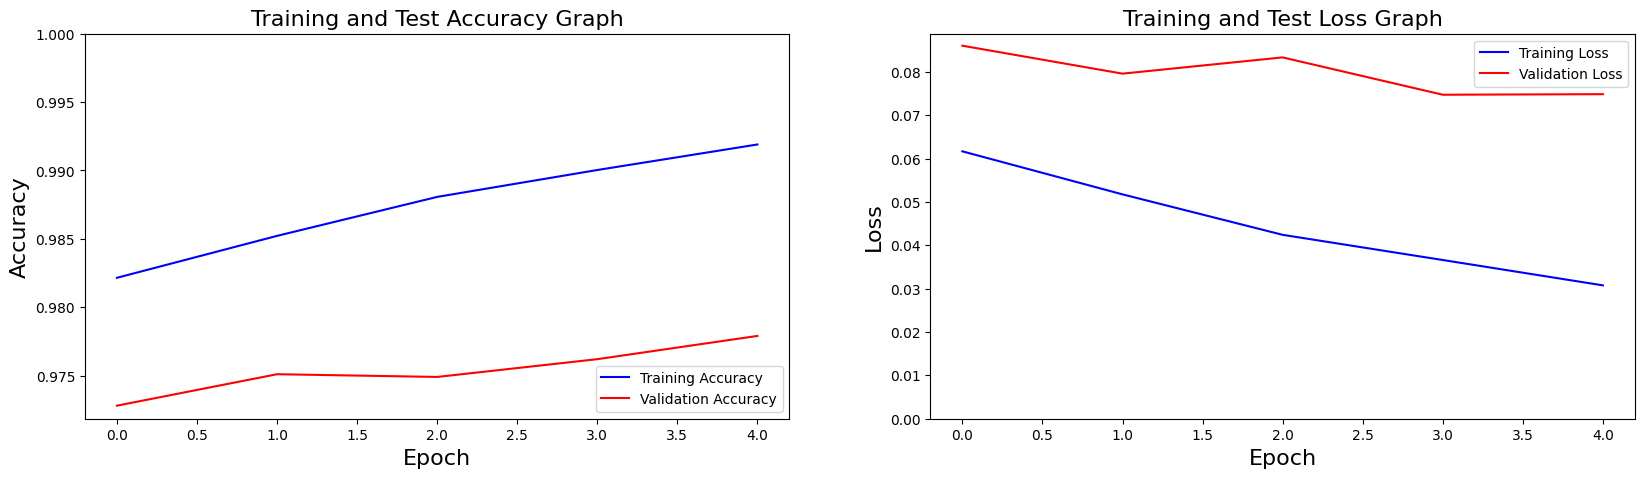

In [57]:
# Evaluation

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Test Accuracy Graph', fontsize=16)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Test Loss Graph', fontsize=16)
plt.show()

In [63]:
loss, precision, recall, accuracy = model.evaluate(X_test, y_test, verbose=-1)
print(f"Loss: {loss * 100:.2f}%, Precision: {precision * 100:.2f}%, Recall: {recall * 100:.2f}%, Accuracy: {accuracy * 100:.2f}%")

Loss: 7.49%, Precision: 97.97%, Recall: 97.60%, Accuracy: 97.79%


In [65]:
model.save("mnist_model.keras")

In [72]:
import random

rand = random.randint(0, X_test.shape[0])
rand

3149

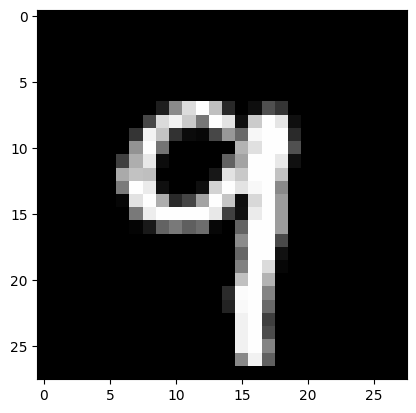

In [73]:
test_img = X_test[rand]
visualize_img(test_img)

In [74]:
test_data = test_img.reshape(1, 28, 28, 1)

In [76]:
model = load_model("mnist_model.keras")

In [77]:
pred = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [78]:
pred

array([[2.7079668e-08, 1.3379678e-09, 1.5124026e-08, 2.2744773e-04,
        3.6025845e-05, 2.5460560e-07, 2.8432300e-11, 3.1150741e-04,
        1.4196569e-05, 9.9941051e-01]], dtype=float32)

In [79]:
out = np.argmax(pred)

In [80]:
out

np.int64(9)